# Plotting RX-SOP

Abstract: RX-SOP is a method for filtering out packets that are below a specified threshold.  However, there are potential downfalls of pushing RX-SOP too low as you have the potential stop responding to clients that fall below the threshold.

This script processes the data collected by poling the controller.  The other Script is found in the same folder which collects the data from a Cisco WLC and logs the output to a file that this script visualizes the results.

The collection script polls the controller for each AP, collects a list of clients pulls the RSSI for each client on the specified interval.

The data looks something like this:

`('AP-Name', '00:aa:bb:cc:dd:ee:ff', '-52')`

In [2]:
#This just enables Jupyter to plot inline.
%matplotlib inline

!ls /Users/jakesnyder/

AHEC-2960C1_2017_5_9_16.36.11.txt     Program.cs
ANK                                   Public
APIC-Config.py                        PycharmProjects
APIC-Ticket-Req.py                    ShareFile
Applications                          TestFile
CompleteInventory.csv                 TestFile 2
CompuNet - Meridian                   TestFile.zip
Desktop                               WASD_EagleElem_AP_Placement-test4.zip
DevNet-Code-Samples                   access_host_1.txt
Documents                             ansible_pub.pem
Douglas                               check_ssl_certs.py
Douglas.zip                           cisco
DouglasFruit_AP_Placements            compunet.json
DouglasFruit_AP_Placements.zip        flask
Downloads                             iox-app-template
Dropbox                               jakeisnotascoolasryan.txt
GNS3                                  jakesnyder.csproj
HD_log.txt                            kismet
IoX                                   newUser.xml
Kism

In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


### Generating plots with matplotlib in Jupyter

One of the advantages of using Jupyter, is that we have a webplatform to visualize statistics directly in Jupyter with the use of matplotlib.  The following example just plots a line graph with each number in the list as an evenly spaced line.

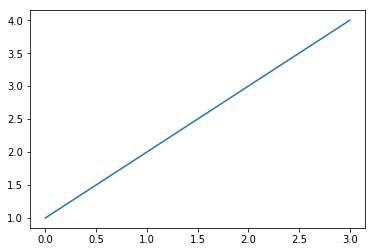

In [7]:
#Generate a simple plot
plt.plot([1,2,3,4])


We can print more interesting data and plotting it out.

In [6]:
#extend a simple plot
plt.plot([1,2,4,8,16,32])

### A Wireless Example with RX-SOP

We won't be using the other script today as we don't have a WLC in class today.  But we have already collected some RX-SOP data from a WLC over the course of a number of hours.

This script parses o

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


# Here we are going to create some lists based on things that we are going to collect.  
ap_lines = []
min_RSSI = []
max_RSSI = []
avg_RSSI = []
AP_Names = []
AP_Clients = []
Clients = []

#
def text_parse(my_input):
    my_output = my_input.replace('\'','').replace(' ', '').replace(')','').replace('(','').replace('\n','')
    return my_output
logging = open('./RXSOP-Logging.log', 'r')
for line in logging:
    ap_lines.append(line)
    if text_parse(line.split(',')[0]) not in AP_Names:
        AP_Names.append(text_parse(line.split(',')[0]))
    if text_parse(line.split(',')[1]) not in Clients:
        Clients.append(text_parse(line.split(',')[1]))
    
for AP in AP_Names:
    count = int(0)
    my_min = int(0)
    my_max = int(-200)
    my_avg = int(0)
    my_total = int(0)
    my_eval = 'Unavailable'
    my_clients = []
    for line in ap_lines:
        #print(text_parse(line.split(',')[2]))
        if (text_parse(line.split(',')[2]) != my_eval) & ( text_parse(line.split(',')[0]) == AP):
            #print("Passed Eval")
            test = int(text_parse(line.split(',')[2]))
            int(test)
            my_rssi = int(test)
            my_total += my_rssi
            if my_rssi > my_max:
                my_max = my_rssi
            if my_rssi < my_min:
                my_min = my_max
            if text_parse(line.split(',')[1]) not in Clients:
                Clients.append(text_parse(line.split(',')[1]))
            if text_parse(line.split(',')[1]) not in my_clients:
                my_clients.append(text_parse(line.split(',')[1]))
            count +=1
    my_avg = my_total / count
    min_RSSI.append(my_min)
    max_RSSI.append(my_max)
    avg_RSSI.append(my_avg)
    AP_Clients.append(len(my_clients))
    
print("APs: " + str(AP_Names))
print("Min RSSI Per AP: " + str(min_RSSI))
print("Max RSSI Per AP: " + str(max_RSSI))
print("Avg RSSI Per AP: " + str(avg_RSSI))
print("Num of Clients:" + str(AP_Clients))


plt.bar(AP_Names, min_RSSI)
plt.bar(AP_Names, avg_RSSI)
plt.bar(AP_Names, max_RSSI)
plt.show()

APs: ['LEW-2602I-01', 'BOI-3602i-05', 'BOI-3602i-04', 'BOI-3602i-03', 'BOI-2802i-01', 'GV-1262-01', 'GV-3502-01', 'SPO-2702i-03', 'PDX-2802i-01', 'BOI-3502i-01', 'BOI-3602i-ConfRm', 'BZN-2602i-02', 'SPO-2602i-01', 'HLN-2602i-02', 'BZN-2602i-01', 'BOI-2702i-05', 'BOI-2702i-06', 'SPO-2602i-02', 'BOI-2802i-03', 'BOI-3602i-01', 'PDX-2802i-02']
Min RSSI Per AP: [-38, -50, -55, -62, -38, -57, -53, -61, -40, -73, -28, -51, -76, -51, -48, -77, -69, -49, -50, -60, -57]
Max RSSI Per AP: [-38, -50, -55, -62, -38, -57, -53, -60, -40, -52, -28, -51, -31, -51, -48, -48, -69, -49, -50, -60, -57]
Avg RSSI Per AP: [-44.696666666666665, -64.43349753694581, -57.45, -63.246153846153845, -49.99148936170213, -77.45185185185186, -74.61354581673307, -61.37, -59.51020408163265, -56.30927835051546, -42.94186046511628, -59.69298245614035, -36.52, -57.70238095238095, -61.013888888888886, -60.906666666666666, -74.09375, -69.46913580246914, -56.8, -60.0, -70.76923076923077]
Num of Clients:[4, 5, 1, 1, 8, 7, 11, 1, 

### What are we seeing in the above plot:

Each bar represents an AP.  Over the durationof the log we plot:
1. Green: the Maximum RSSI recorded by a client
2. Orange: The Average RSSI recorded by all the APs clients
3. Blue: The Lowest RSSI recorded from a client
